In [2]:
#Data Handling
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Modelsl
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

#Evalutaion
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


# save model 
import joblib
 



# 1. Data Understanding and Preprocessing:

In [3]:
data=pd.read_csv('heart.csv')

##  Display the first 5 rows of the dataset


In [4]:
print("Dataset Preview:")
data.head()

Dataset Preview:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## dataset information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.shape


(303, 14)

##  Statistical summary


In [7]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

## Check for duplicate rows


In [8]:
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")



Number of duplicate rows: 1


In [9]:
data=data.drop_duplicates()

In [10]:
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")



Number of duplicate rows: 0


## Check for missing values


In [11]:
print("\nMissing Values:")
print(data.isnull().sum()/len(data)*100)


Missing Values:
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


data is balanced

## Splitting dataset into features and target


In [12]:
X = data.drop(columns=['target'])
y = data['target']

##  Scaling features


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#save 
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']


## Splitting into train and test sets


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)  

# 2.	Exploratory Data Analysis (EDA):

## Categorical Data Visulization


### Sex (GENDER)

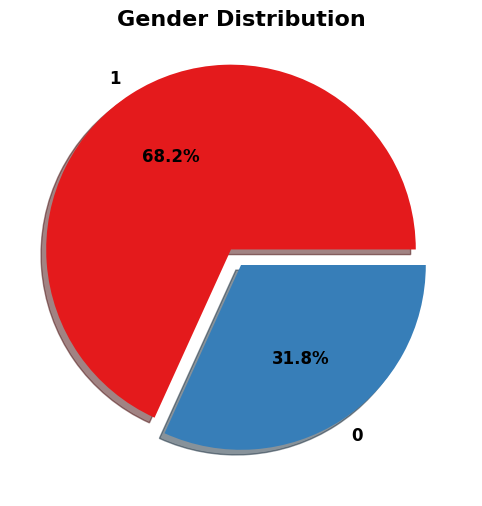

In [17]:
colors = sns.color_palette("Set1", n_colors=2)

# Plotting the pie chart with modern touches
plt.figure(figsize=(8, 6))
plt.pie(data['sex'].value_counts(), 
        labels=['1', '0'], 
        autopct='%1.1f%%', 
        shadow=True, 
        explode=[0.1, 0], 
        colors=colors,
        textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

# Adding a modern title
plt.title('Gender Distribution', fontsize=16, fontweight='bold')

plt.show()

### cp (Chest Pain Type)


C:\Users\Ahmed Abdeen\AppData\Local\Temp\ipykernel_6508\1088830914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cp', data=data, order=order, palette='Set1')


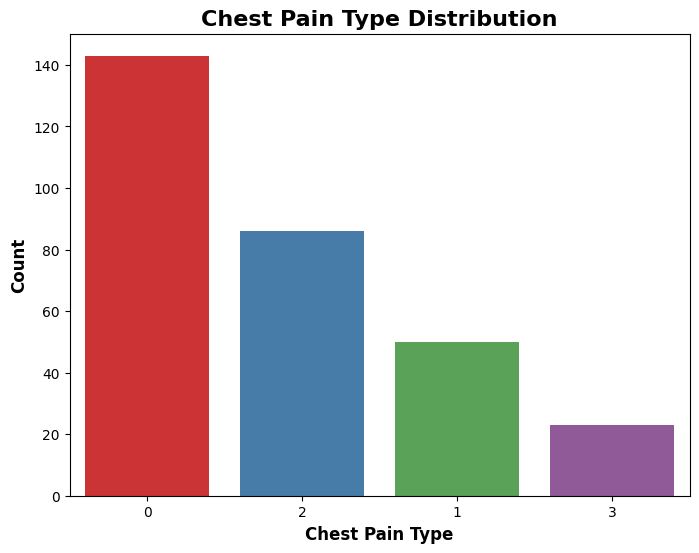

In [18]:

order = data['cp'].value_counts().index

# Creating the countplot with the Set1 color palette
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='cp', data=data, order=order, palette='Set1')

# Title styling
plt.title('Chest Pain Type Distribution', fontsize=16, fontweight='bold')

# Adjusting the axis labels and title for better readability
plt.xlabel('Chest Pain Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

plt.show()

### fbs (Fasting Blood Sugar)


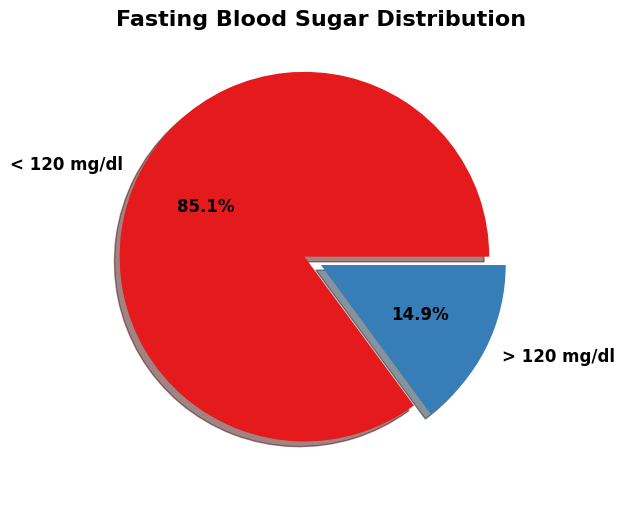

In [19]:
colors = sns.color_palette("Set1", n_colors=2)

# Plotting the pie chart with modern styling
plt.figure(figsize=(8, 6))
plt.pie(data['fbs'].value_counts(), 
        labels=["< 120 mg/dl", "> 120 mg/dl"], 
        autopct='%1.1f%%', 
        colors=colors, 
        shadow=True, 
        
        explode=[0.1, 0], 

        textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

# Adding a modern title
plt.title('Fasting Blood Sugar Distribution', fontsize=16, fontweight='bold')

plt.show()

### restecg (Resting Electrocardiographic Results)


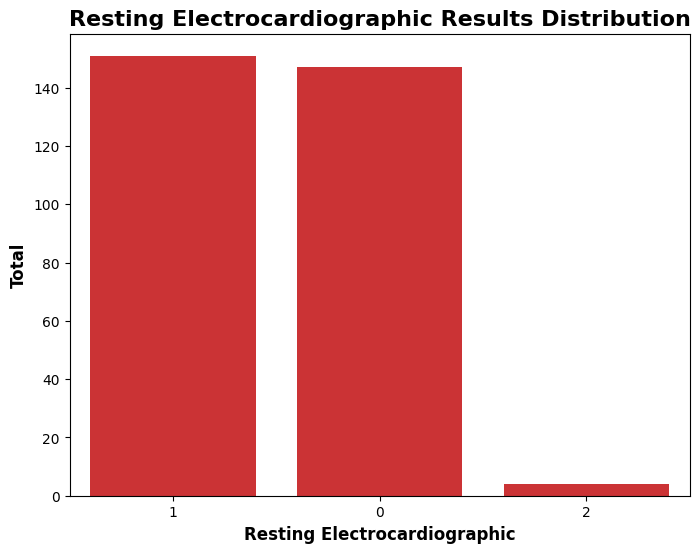

In [20]:
sns.set_palette("Set1")

# Ordering the data
order = data['restecg'].value_counts().index

# Creating the countplot with modern style
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='restecg', data=data, order=order)

# Title and label styling
plt.title('Resting Electrocardiographic Results Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Resting Electrocardiographic', fontsize=12, fontweight='bold')
plt.ylabel('Total', fontsize=12, fontweight='bold')

plt.show()

### exang (Exercise Induced Angina)


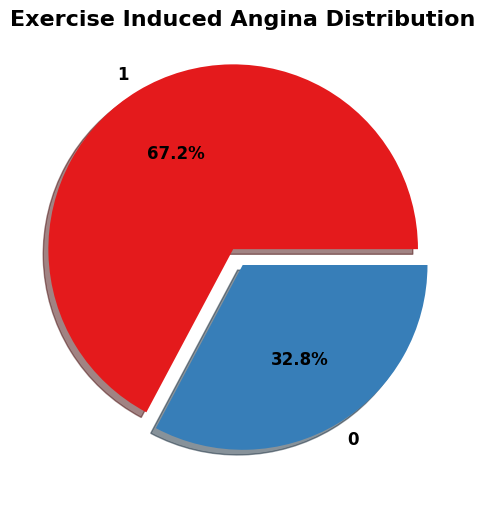

In [21]:
colors = sns.color_palette("Set1", n_colors=2)

# Plotting the pie chart with modern styling
plt.figure(figsize=(8, 6))
plt.pie(data['exang'].value_counts(), 
        labels=['1', '0'], 
        autopct='%1.1f%%', 
        shadow=True, 
        explode=[0.1, 0], 
        colors=colors, 
        textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

# Adding a modern title
plt.title('Exercise Induced Angina Distribution', fontsize=16, fontweight='bold')

plt.show()

### slope (Slope of the Peak Exercise)


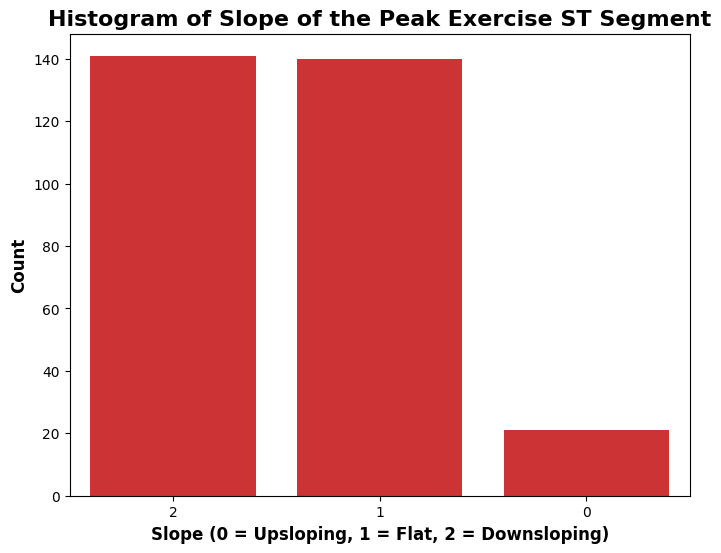

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='slope', data=data, order=data['slope'].value_counts().index)

# Title and axis label styling
plt.title('Histogram of Slope of the Peak Exercise ST Segment', fontsize=16, fontweight='bold')
plt.xlabel('Slope (0 = Upsloping, 1 = Flat, 2 = Downsloping)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

plt.show()

### ca (Number of Major Vessels)


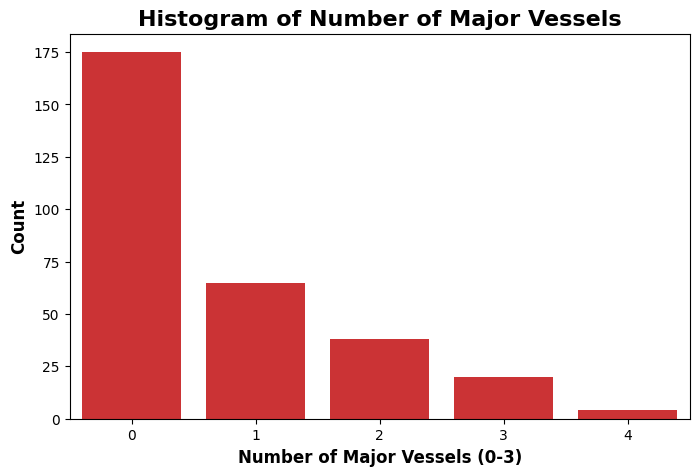

In [24]:
# Creating the countplot with a modern style
plt.figure(figsize=(8, 5))
sns.countplot(x='ca', data=data, order=data['ca'].value_counts().index)

# Title and axis label styling
plt.title('Histogram of Number of Major Vessels', fontsize=16, fontweight='bold')
plt.xlabel('Number of Major Vessels (0-3)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

plt.show()

### thal

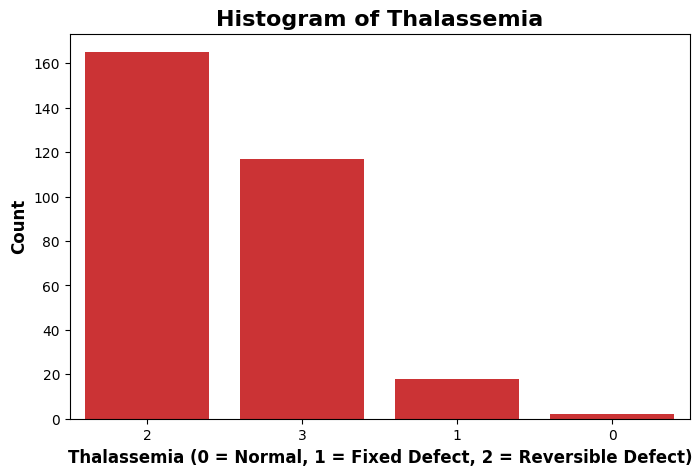

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='thal', data=data, order=data['thal'].value_counts().index)

# Title and axis label styling
plt.title('Histogram of Thalassemia', fontsize=16, fontweight='bold')
plt.xlabel('Thalassemia (0 = Normal, 1 = Fixed Defect, 2 = Reversible Defect)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Displaying the plot
plt.show()

### target (Heart Diseases Status)

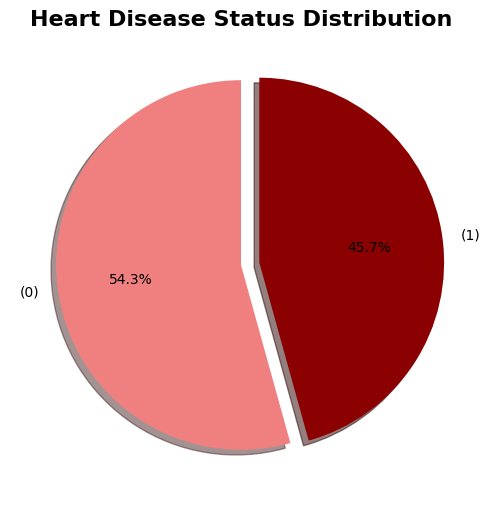

In [26]:
plt.figure(figsize=(8, 6))
plt.pie(data['target'].value_counts(), 
        labels=["(0)", "(1)"], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightcoral', 'darkred'],  # Using different shades of red
        explode=[0, 0.1],
        shadow=True)

# Title styling
plt.title('Heart Disease Status Distribution', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


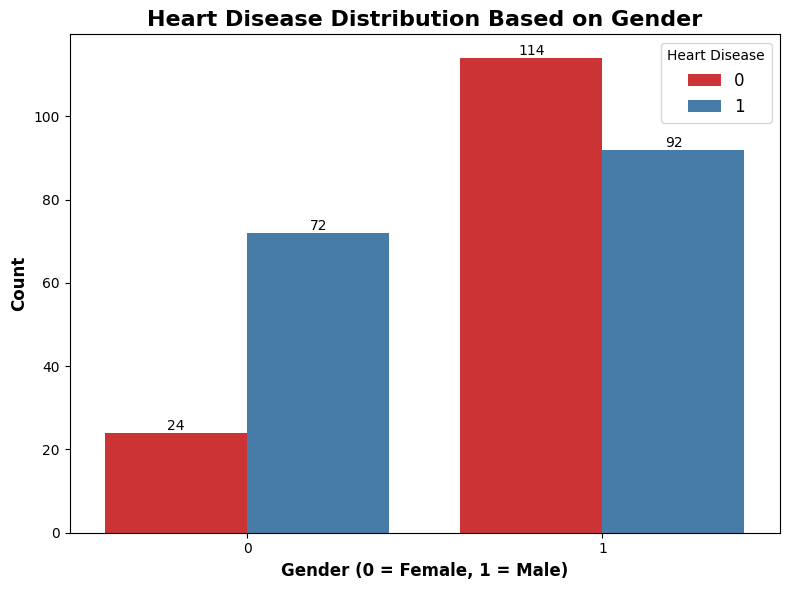

In [28]:

# Creating the countplot with a modern style
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', hue='target', data=data)

# Title and axis label styling
plt.title('Heart Disease Distribution Based on Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Adding legend and counts above the bars
plt.legend(loc='upper right', title='Heart Disease', fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

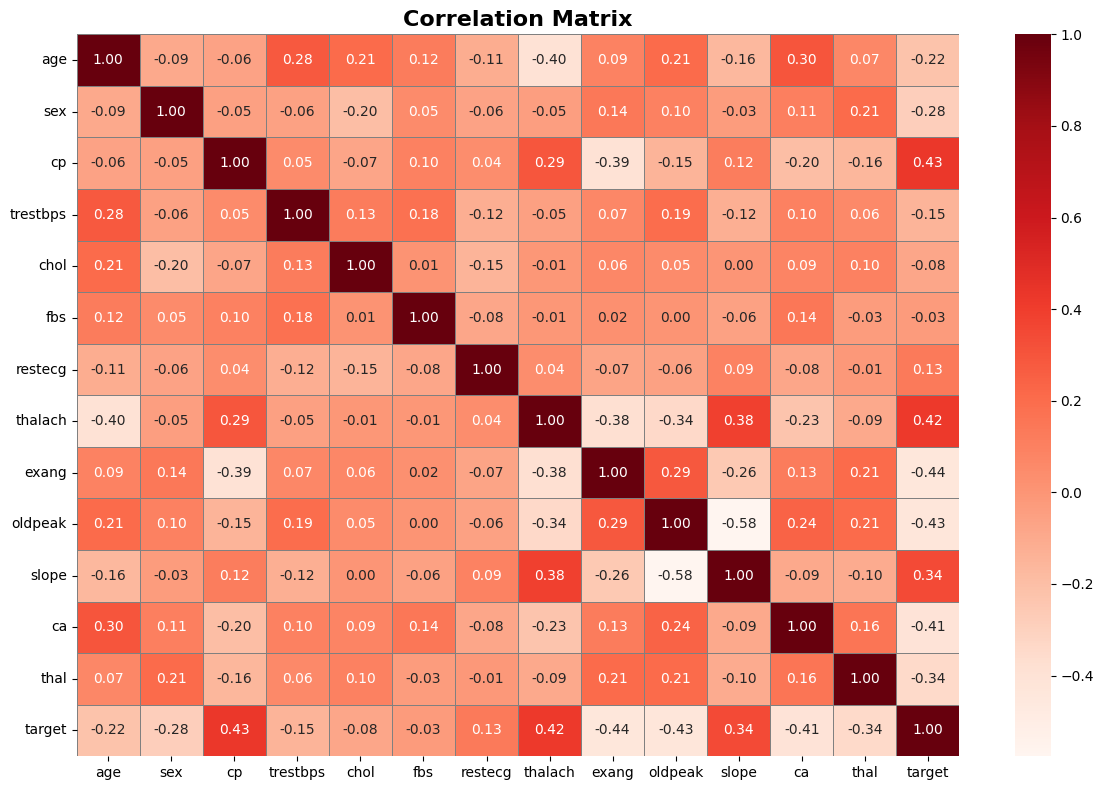

In [29]:
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap with a red color scheme
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5, linecolor='gray')

# Title styling
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

## Distributions

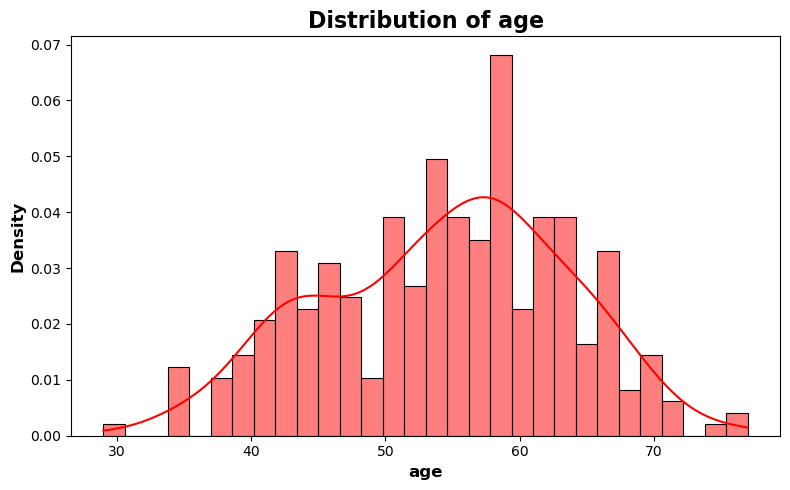

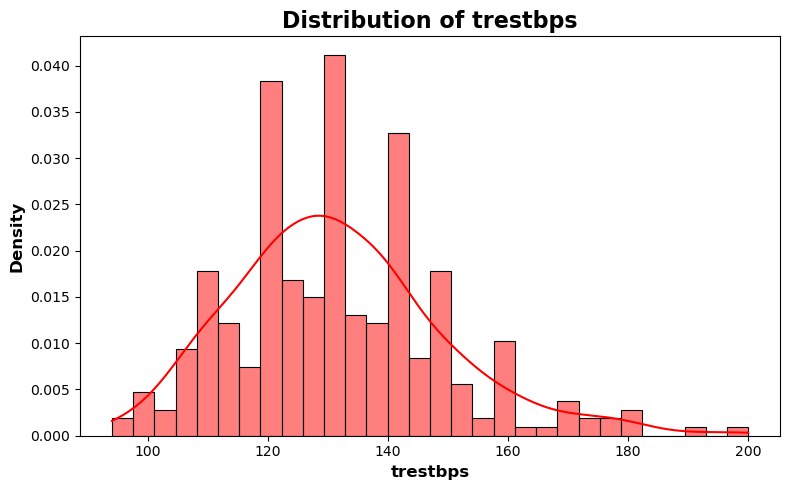

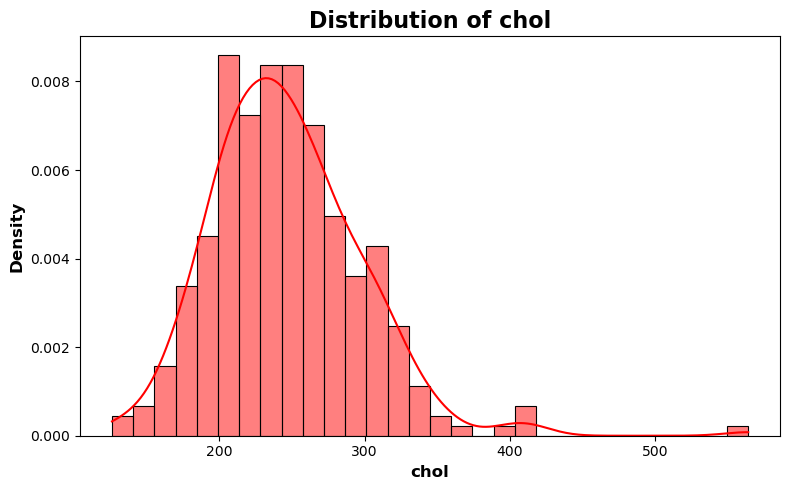

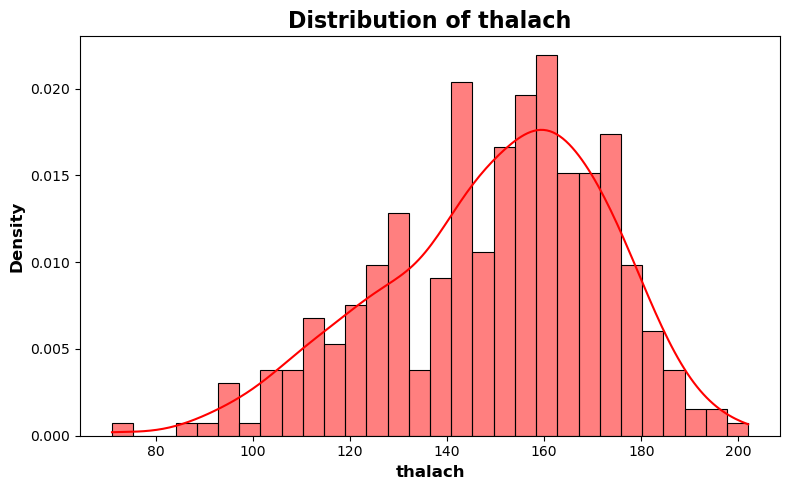

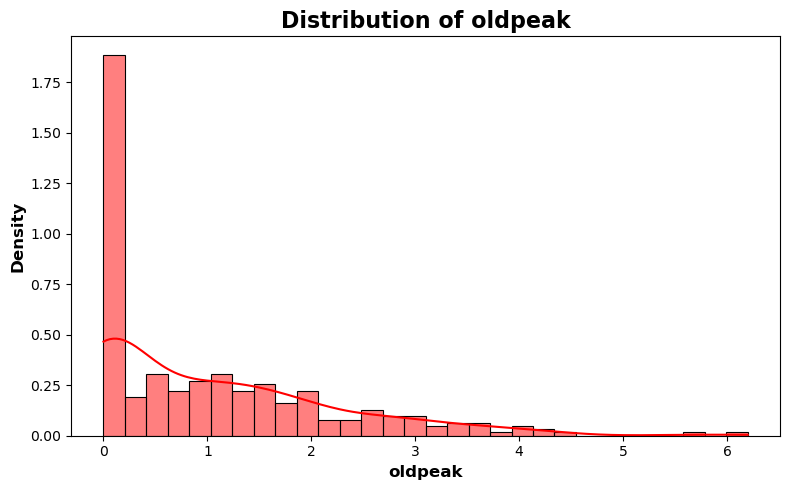

In [38]:
numerical_features = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

# Loop to plot the distribution of each numerical feature
for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='red', stat='density', linewidth=0.8)

    # Title and axis label styling
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Density', fontsize=12, fontweight='bold')

    # Display the plot
    plt.tight_layout()
    plt.show()

## Box Plot for outlair

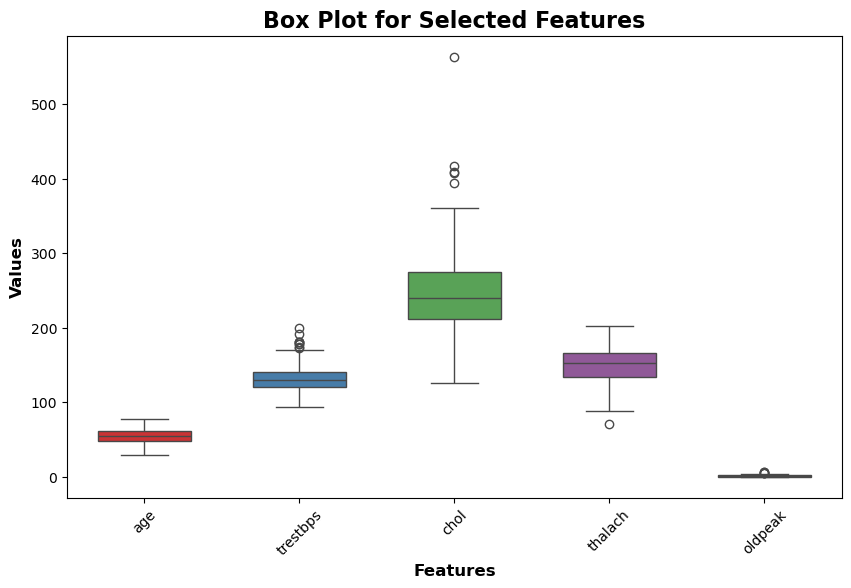

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], width=0.6)

# Title and axis label styling
plt.title('Box Plot for Selected Features', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')

# Displaying the plot
plt.xticks(rotation=45)
plt.show()

# Models


## Logistic Regression


In [31]:
# Model 1: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_score(y_train, lr_model.predict(X_train))

0.8589211618257261

## support vector machine

In [ ]:
# Model 2: support vector machine
svc=SVC(random_state=42)
svc.fit(X_train, y_train)
accuracy_score(y_train, svc.predict(X_train))   

0.9087136929460581

## k nearest neighbor

In [33]:
# Model 3: k nearest neighbor
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_score(y_train, knn.predict(X_train))


0.8589211618257261

## Voting

In [34]:
voting=VotingClassifier(estimators=[('lr', lr_model),('svc',svc),('knn',knn)], voting='hard')
#save model
voting.fit(X_train, y_train)
# joblib.dump(voting, 'voting.joblib')

accuracy_score(y_train, voting.predict(X_train))

0.8962655601659751

In [35]:
# Evaluate models
models = {'Logistic Regression': lr_model, 'Support Vector Machine': svc, 'K-Nearest Neighbors': knn, 'Voting Classifier': voting}
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"\n{name} Classification Report :")
    print("train")
    print(classification_report(y_train, y_pred_train))
    print("*"*50)
    print("test")
    print(classification_report(y_test, y_pred_test))
    print("*"*50)


Logistic Regression Classification Report :
train
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.86      0.89      0.87       132

    accuracy                           0.86       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241

**************************************************
test
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

**************************************************

Support Vector Machine Classification Report :
train
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       109
           1       0.89  

## Grid Search


In [40]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create StratifiedKFold for robust cross-validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Expanded Grid Search for Logistic Regression
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_params,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_

# Expanded Grid Search for SVM
svc_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'probability': [True]
}
svc_grid = GridSearchCV(
    SVC(random_state=42),
    svc_params,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_

# Expanded Grid Search for K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_params,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Updated Voting Classifier with the best models
voting = VotingClassifier(estimators=[
    ('Logistic Regression', best_lr),
    ('SVM', best_svc),
    ('KNN', best_knn)
], voting='hard')

# Fit Voting Classifier
voting.fit(X_train, y_train)

# Save the Voting Classifier
joblib.dump(voting, 'voting_classifier_optimized_complex.joblib')

# Evaluate models
models = {
    'Logistic Regression (Optimized)': best_lr,
    'Support Vector Machine (Optimized)': best_svc,
    'K-Nearest Neighbors (Optimized)': best_knn,
    'Voting Classifier (Optimized)': voting
}

for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"\n{name} Classification Report:")
    print("Train:")
    print(classification_report(y_train, y_pred_train))
    print("-" * 50)
    print("Test:")
    print(classification_report(y_test, y_pred_test))
    print("-" * 50)


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


c:\Users\Ahmed Abdeen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1050 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ahmed Abdeen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ahmed Abdeen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Ahmed Abdeen\AppData\Local\Programs\

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits

Logistic Regression (Optimized) Classification Report:
Train:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       109
           1       0.83      0.90      0.87       132

    accuracy                           0.85       241
   macro avg       0.85      0.84      0.84       241
weighted avg       0.85      0.85      0.85       241

--------------------------------------------------
Test:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

--------------------------------------------------

Support Vector Machine (Optimized) Classificat

In [41]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression (Optimized)
print("Logistic Regression (Optimized) Confusion Matrix:")

# For the training set
train_cm = confusion_matrix(y_train, best_lr.predict(X_train))
print("\nTraining Set Confusion Matrix:")
print(train_cm)

# For the test set
test_cm = confusion_matrix(y_test, best_lr.predict(X_test))
print("\nTest Set Confusion Matrix:")
print(test_cm)


Logistic Regression (Optimized) Confusion Matrix:

Training Set Confusion Matrix:
[[ 85  24]
 [ 13 119]]

Test Set Confusion Matrix:
[[25  4]
 [ 3 29]]


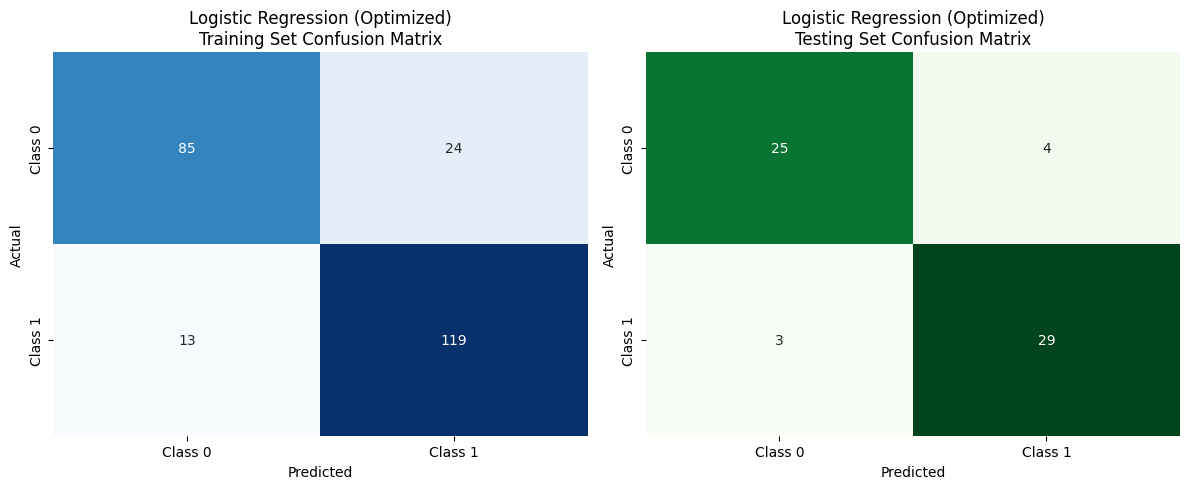

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
train_cm = confusion_matrix(y_train, best_lr.predict(X_train))
test_cm = confusion_matrix(y_test, best_lr.predict(X_test))

# Plot heatmap for training confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Logistic Regression (Optimized)\nTraining Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plot heatmap for testing confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Logistic Regression (Optimized)\nTesting Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()
